In [18]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


In [19]:
#loading the dataset and splitting it into training and testing dataset
(X_train, y_train), (X_test, y_test)=mnist.load_data()
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [20]:
#converting the image into binary and gray scaling it
def plot_input_img(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.show()

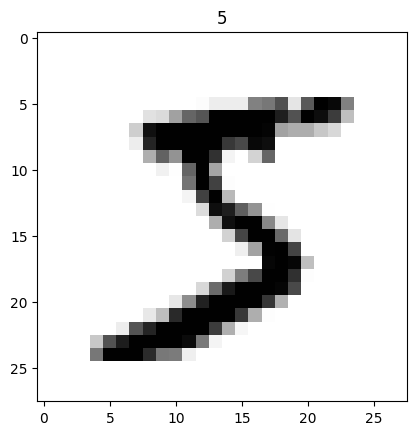

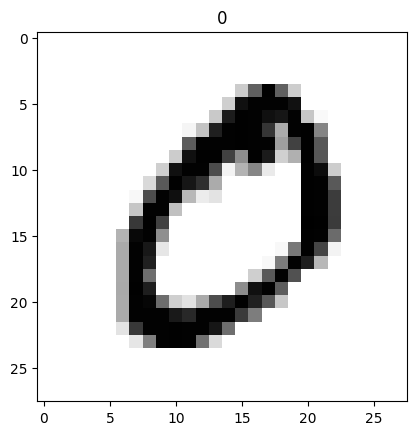

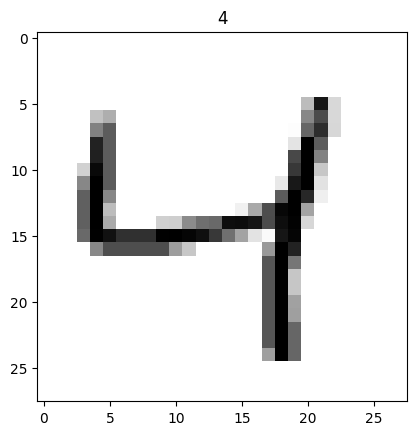

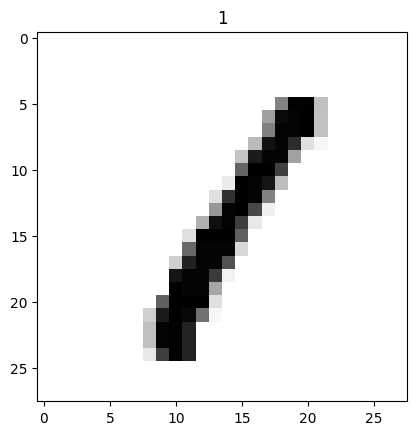

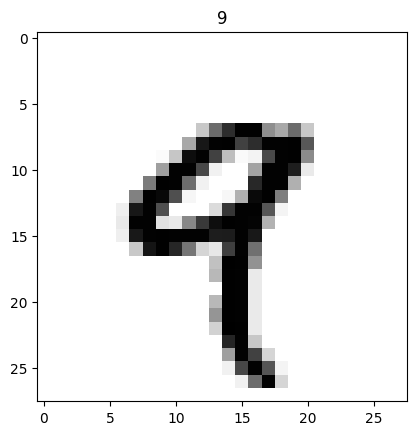

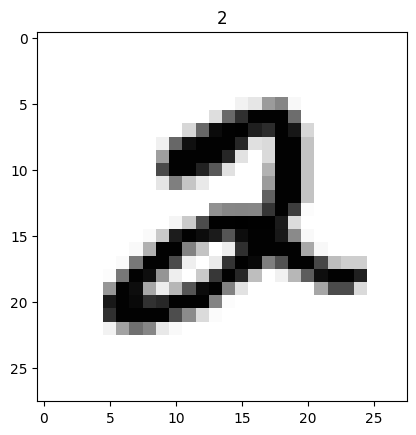

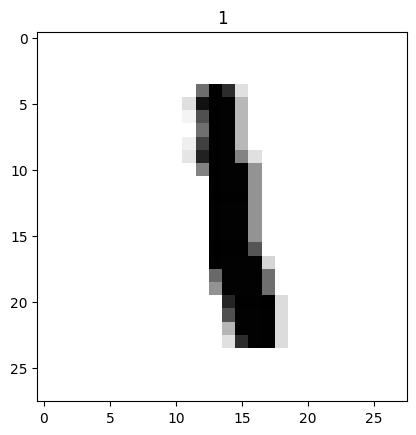

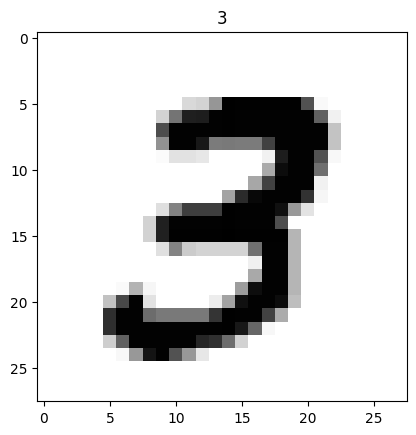

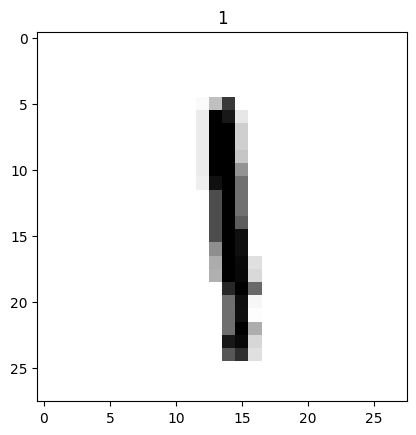

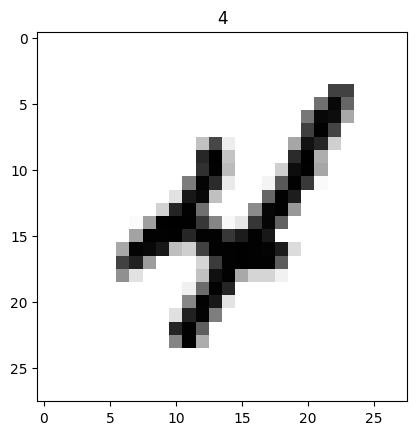

In [21]:
#plotting first 10 images for preview 
for i in range(10):
    plot_input_img(i)

In [22]:
#reshaping the and normalising the image
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255

X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [23]:
#checking the training model image shape
X_train.shape

(60000, 28, 28, 1)

In [24]:
y_train=keras.utils.to_categorical(y_train)


In [25]:
y_test=keras.utils.to_categorical(y_test)

In [26]:
# creating our CNN model
model = Sequential()
model.add(Conv2D(32,(3, 3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 7744)              0         
                                                                 
 dropout_1 (Dropout)         (None, 7744)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                77450     
                                                      

Total params: 96,266
Trainable params: 96,266
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [28]:
#Adding callbacks to model to avoid overfitting
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

mc = ModelCheckpoint("./bestmodel.h5", monitor="val_acc", verbose=1, save_best_only=True)

cb=[es,mc]

In [29]:
#Model training
his = model.fit(X_train, y_train, epochs=5, validation_split=0.3, callbacks=cb)

Epoch 1/5
1313/1313 [==============================] - 29s 21ms/step - loss: 0.1695 - accuracy: 0.9481 - val_loss: 0.0717 - val_accuracy: 0.9782
Epoch 2/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0581 - accuracy: 0.9827 - val_loss: 0.0579 - val_accuracy: 0.9827
Epoch 3/5
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0417 - accuracy: 0.9867 - val_loss: 0.0465 - val_accuracy: 0.9857
Epoch 4/5
 491/1313 [==========>...................] - ETA: 13s - loss: 0.0276 - accuracy: 0.9915

In [ ]:
#saving the model
model.save('bestmodel.h5')
print("Saving the bot as bestmodelmodel.h5")

Saving the bot as bestmodelmodel.h5


In [ ]:
model_S=keras.models.load_model("bestmodel.h5")

In [ ]:
score=model_S.evaluate(X_test, y_test)
print(f"the model accuracy is {score[1]}")
print(f"The model is",score[1]*100,"% accurate")


313/313 [==============================] - 2s 5ms/step - loss: 0.0389 - accuracy: 0.9886
the model accuracy is 0.9886000156402588
The model is 98.86000156402588 % accurate


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


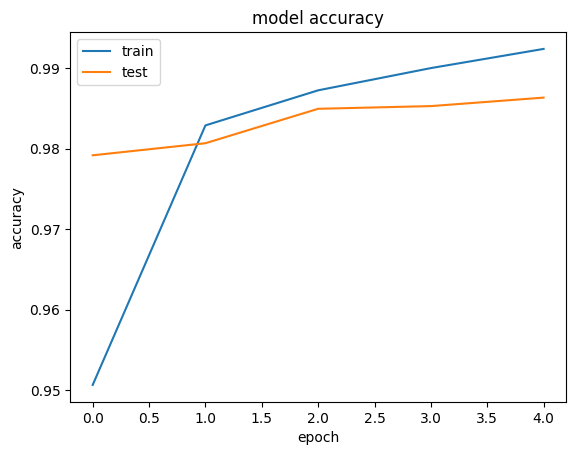

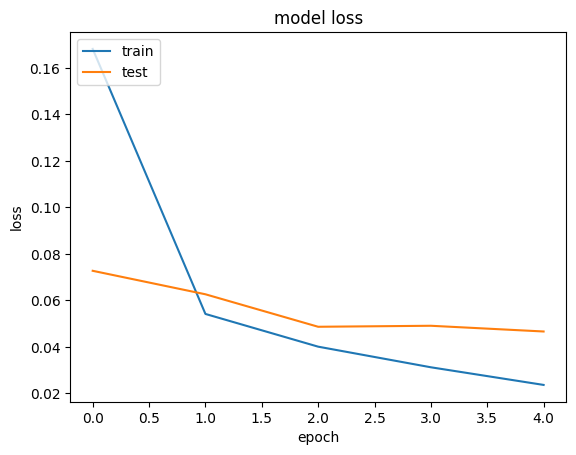

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(his.history.keys())
# summarize training for accuracy
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#GUI for model
from tokenize import Number
from numpy import testing
from numpy.lib.type_check import imag

import pygame, sys
from pygame import image
from pygame.locals import *
import numpy as np
from keras.models import load_model
import cv2
from tensorflow.python.keras.backend import constant


WINDOWSIZEX = 640
WINDOWSIZEY = 480

WHITE=(255,255,255)
BLACK=(0,0,0)
RED=(255,0,0)

IMAGESAVE=False

BOUNDARYINC = 5

MODEL = load_model("bestmodel.h5")

LABELS={0:"Zero", 1:"One", 2:"Two", 3:"Three", 4:"Four", 5:"Five", 6:"Six", 7:"Seven", 8:"Eight", 9:"Nine"}

pygame.init()

FONT=pygame.font.Font("freesansbold.ttf", 18)
DISPLAYSURF=pygame.display.set_mode((WINDOWSIZEX, WINDOWSIZEY))



pygame.display.set_caption("Digit Board")

iswriting=False

number_xcord=[]
number_ycord=[]
imag_cnt=1
PREDICT = True

while True:
    for event in pygame.event.get():
        if event.type==QUIT:
            pygame.quit()
            sys.exit()
        if event.type == MOUSEMOTION and iswriting:
            xcord, ycord = event.pos
            pygame.draw.circle(DISPLAYSURF, WHITE, (xcord, ycord), 4, 0)

            number_xcord.append(xcord)
            number_ycord.append(ycord)
        if event.type==MOUSEBUTTONUP:
            iswriting=False
            number_xcord=sorted(number_xcord)
            number_ycord=sorted(number_ycord)

            rect_min_x , rect_max_x = max(number_xcord[0]-BOUNDARYINC, 0),min(WINDOWSIZEX, number_xcord[-1]+BOUNDARYINC)
            rect_min_y , rect_max_y = max(number_ycord[0]-BOUNDARYINC, 0),min(WINDOWSIZEX, number_ycord[-1]+BOUNDARYINC)

            number_xcord=[]
            number_ycord=[]

            img_arr=np.array(pygame.PixelArray(DISPLAYSURF))[rect_min_x:rect_max_x,rect_min_y:rect_max_y].T.astype(np.float32)

            if IMAGESAVE:
                cv2.imwrite("image.png")
                imag_cnt +=1

            if PREDICT:
                image = cv2.resize(img_arr, (28,28))
                image = np.pad(image, (10,10), "constant", constant_values = 0)
                image = cv2.resize(image, (28,28))/255

                label = str(LABELS[np.argmax(MODEL.predict(image.reshape(1,28,28,1)))])

                textSurface = FONT.render(label, True, RED, WHITE)
                textRecObj = textSurface.get_rect()
                textRecObj.left , textRecObj.bottom = rect_min_x, rect_max_y

                DISPLAYSURF.blit(textSurface , textRecObj)
            if event.type==KEYDOWN:
                if event.unicode=='n':
                    DISPLAYSURF.fill(BLACK)

        pygame.display.update()

        if event.type == MOUSEBUTTONDOWN:
            iswriting=True
    

pygame 2.3.0 (SDL 2.24.2, Python 3.11.0)
Hello from the pygame community. https://www.pygame.org/contribute.html
1/1 [==============================] - 0s 25ms/step


SystemExit: 

C:\Users\rahla\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
